In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('G:\Datasets\imdb_top_1000.csv',thousands=',')

In [2]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [3]:
df=df.dropna(subset=['Meta_score'])
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [4]:
m= int(df["Gross"].mean())
df['Gross'].fillna(value=m, inplace=True)
df.isnull().sum()

Poster_Link       0
Series_Title      0
Released_Year     0
Certificate      56
Runtime           0
Genre             0
IMDB_Rating       0
Overview          0
Meta_score        0
Director          0
Star1             0
Star2             0
Star3             0
Star4             0
No_of_Votes       0
Gross             0
dtype: int64

In [5]:
m

74952069

,Director,Gross
477,J.J. Abrams,936662225.0
59,Anthony Russo,858373000.0
623,James Cameron,760507625.0
60,Anthony Russo,678815482.0
652,James Cameron,659325379.0
357,Joss Whedon,623279547.0
891,Brad Bird,608581744.0
2,Christopher Nolan,534858444.0
582,Gareth Edwards,532177324.0
63,Christopher Nolan,448139099.0


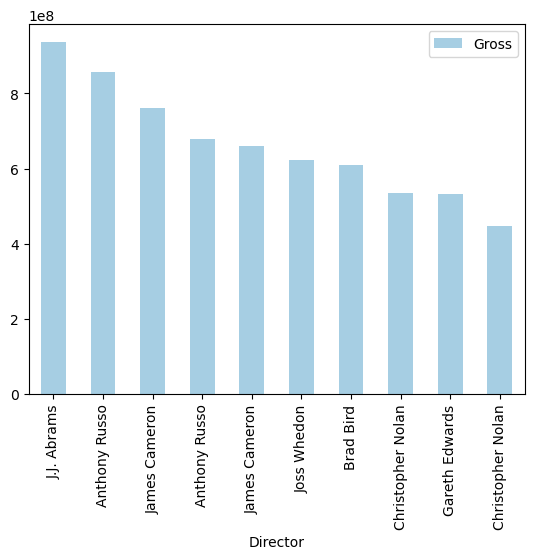

In [6]:
df1=df[['Director','Gross']]
df1=df1.sort_values('Gross', ascending = False)
df1=df1.head(10)
df1.plot(x='Director', y='Gross', kind='bar', colormap='Paired')
df1

                                                 Stars        Gross
477  Daisy Ridley, John Boyega, Oscar Isaac, Domhna...  936662225.0
59   Joe Russo, Robert Downey Jr., Chris Evans, Mar...  858373000.0
623  Sam Worthington, Zoe Saldana, Sigourney Weaver...  760507625.0
60   Joe Russo, Robert Downey Jr., Chris Hemsworth,...  678815482.0
652  Leonardo DiCaprio, Kate Winslet, Billy Zane, K...  659325379.0
357  Robert Downey Jr., Chris Evans, Scarlett Johan...  623279547.0
891  Craig T. Nelson, Holly Hunter, Sarah Vowell, H...  608581744.0
2    Christian Bale, Heath Ledger, Aaron Eckhart, M...  534858444.0
582  Felicity Jones, Diego Luna, Alan Tudyk, Donnie...  532177324.0
63   Christian Bale, Tom Hardy, Anne Hathaway, Gary...  448139099.0


Text(0.5, 1.0, 'Gross vs Stars')

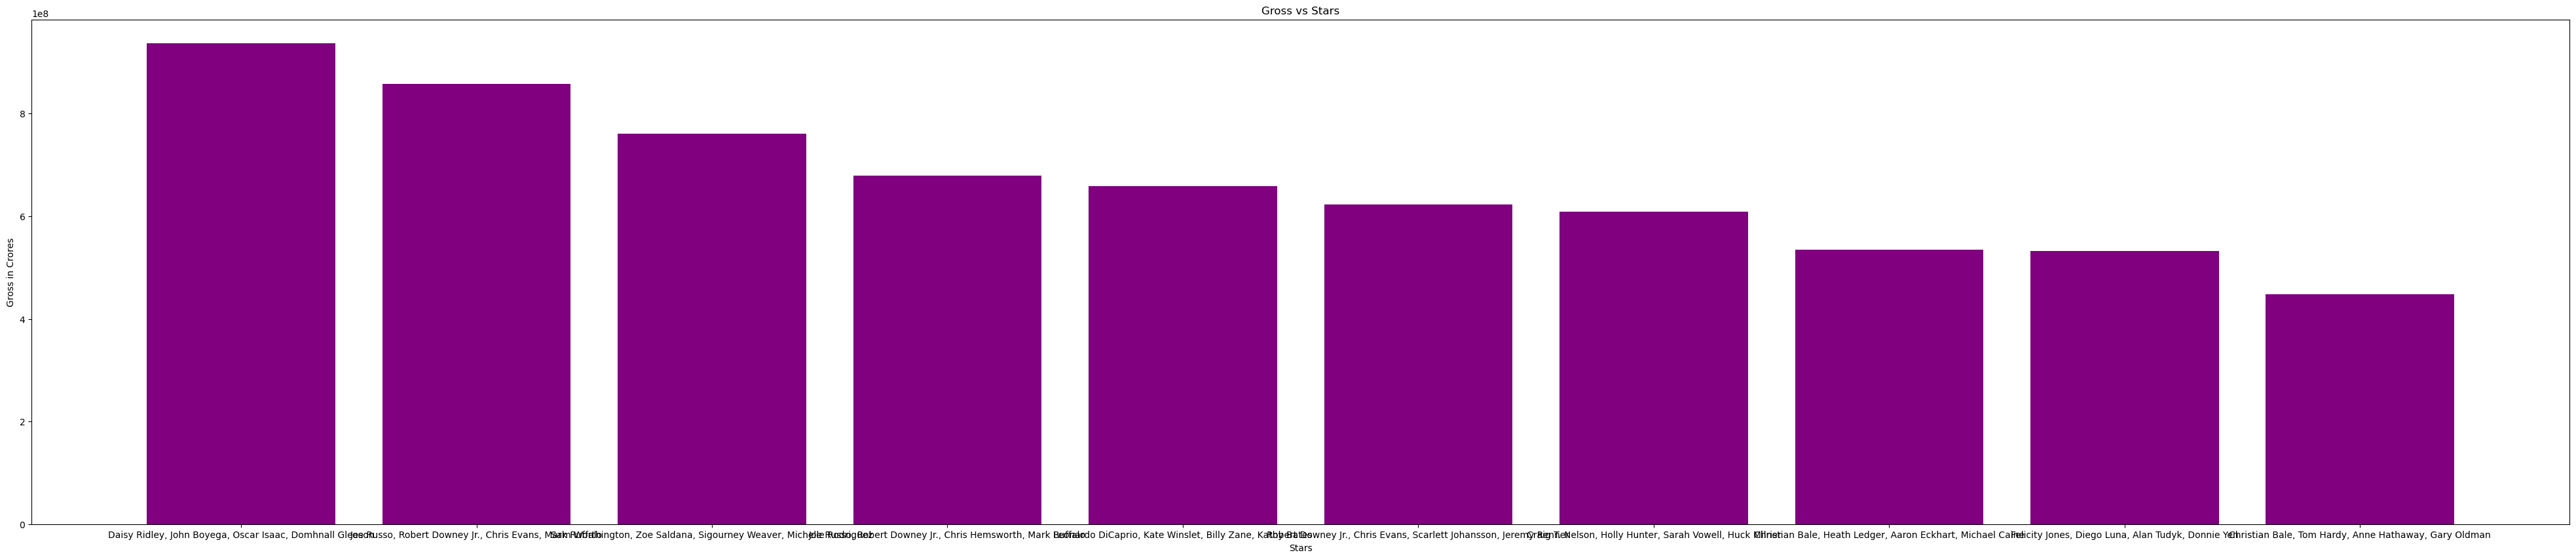

In [7]:
df['Stars']= df['Star1'].map(str) +', '+ df['Star2'].map(str) +', '+ df['Star3'].map(str) +', '+ df['Star4'].map(str)
df2=df[['Stars','Gross']]
df2=df2.sort_values('Gross', ascending = False)
df2=df2.head(10)
print(df2)
x= df2["Stars"]
y = df2["Gross"]
fig = plt.figure(figsize = (50, 10))
plt.bar(x,y, color='Purple')
plt.xlabel("Stars")
plt.ylabel("Gross in Crores")
plt.title("Gross vs Stars")

,No_of_Votes,Director
0,2343110,Frank Darabont
2,2303232,Christopher Nolan
8,2067042,Christopher Nolan
9,1854740,David Fincher
6,1826188,Quentin Tarantino
11,1809221,Robert Zemeckis
14,1676426,Lana Wachowski
10,1661481,Peter Jackson
5,1642758,Peter Jackson
1,1620367,Francis Ford Coppola


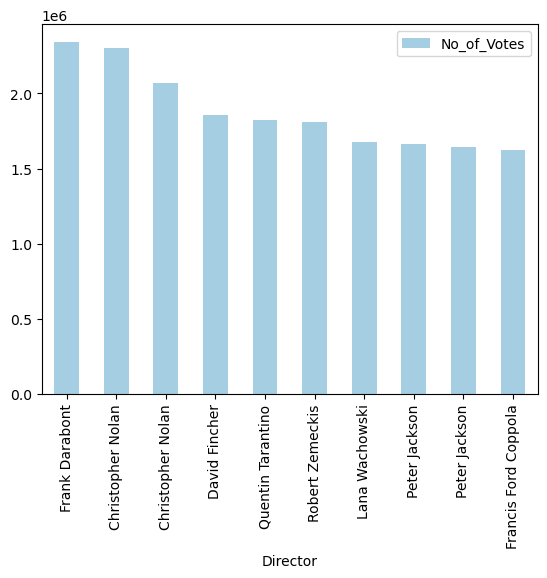

In [8]:
df3=df[['No_of_Votes','Director']]
df3=df3.sort_values('No_of_Votes', ascending = False)
df3=df3.head(10)
df3.plot(x='Director', y='No_of_Votes', kind='bar', colormap='Paired')
df3

In [9]:
df.pivot_table(index = ['Genre'], aggfunc ='size')

Genre
Action, Adventure              5
Action, Adventure, Comedy      7
Action, Adventure, Drama      13
Action, Adventure, Family      1
Action, Adventure, Fantasy     6
                              ..
Mystery, Romance, Thriller     1
Mystery, Sci-Fi, Thriller      2
Mystery, Thriller              5
Thriller                       1
Western                        4
Length: 184, dtype: int64

In [10]:
df4=df[['No_of_Votes','Stars']]
df4=df4.sort_values('No_of_Votes', ascending = False)
df4=df4.head(10)
df4

,No_of_Votes,Stars
0,2343110,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
2,2303232,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
8,2067042,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio..."
9,1854740,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier"
6,1826188,"John Travolta, Uma Thurman, Samuel L. Jackson,..."
11,1809221,"Tom Hanks, Robin Wright, Gary Sinise, Sally Field"
14,1676426,"Lilly Wachowski, Keanu Reeves, Laurence Fishbu..."
10,1661481,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean..."
5,1642758,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or..."
1,1620367,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."


<AxesSubplot:xlabel='Stars'>

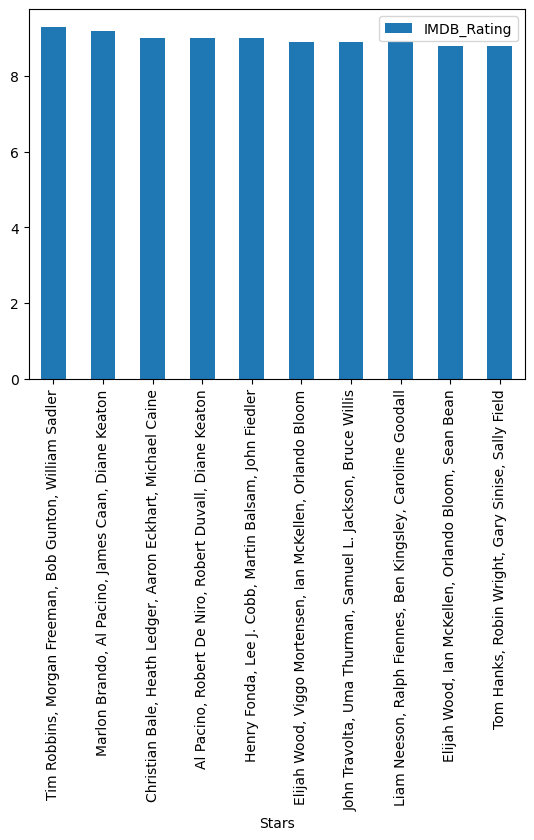

In [11]:
df5=df[['IMDB_Rating','Stars']]
df5=df5.sort_values('IMDB_Rating', ascending = False)
df5=df5.head(10)
df5
df5.plot(x='Stars', y='IMDB_Rating', kind='bar')

In [12]:
l=[]
for i in df['Genre']:
    l+=i.split(',')
for i in range(len(l)):
    l[i]=str(l[i]).strip()
# l=list(set(l))
f={}
for i in l:
    if i in f:
        f[i]+=1
    else:
        f[i]=1
print(f)
df6= pd.DataFrame(f.items(), columns=['Genre', 'Count'])
df6

{'Drama': 600, 'Crime': 169, 'Action': 156, 'Adventure': 180, 'Biography': 97, 'History': 48, 'Sci-Fi': 62, 'Romance': 104, 'Western': 20, 'Fantasy': 58, 'Comedy': 188, 'Thriller': 118, 'Animation': 75, 'Family': 50, 'War': 45, 'Mystery': 80, 'Music': 29, 'Horror': 27, 'Sport': 17, 'Musical': 12, 'Film-Noir': 11}


,Genre,Count
0,Drama,600
1,Crime,169
2,Action,156
3,Adventure,180
4,Biography,97
5,History,48
6,Sci-Fi,62
7,Romance,104
8,Western,20
9,Fantasy,58


<AxesSubplot:xlabel='Genre'>

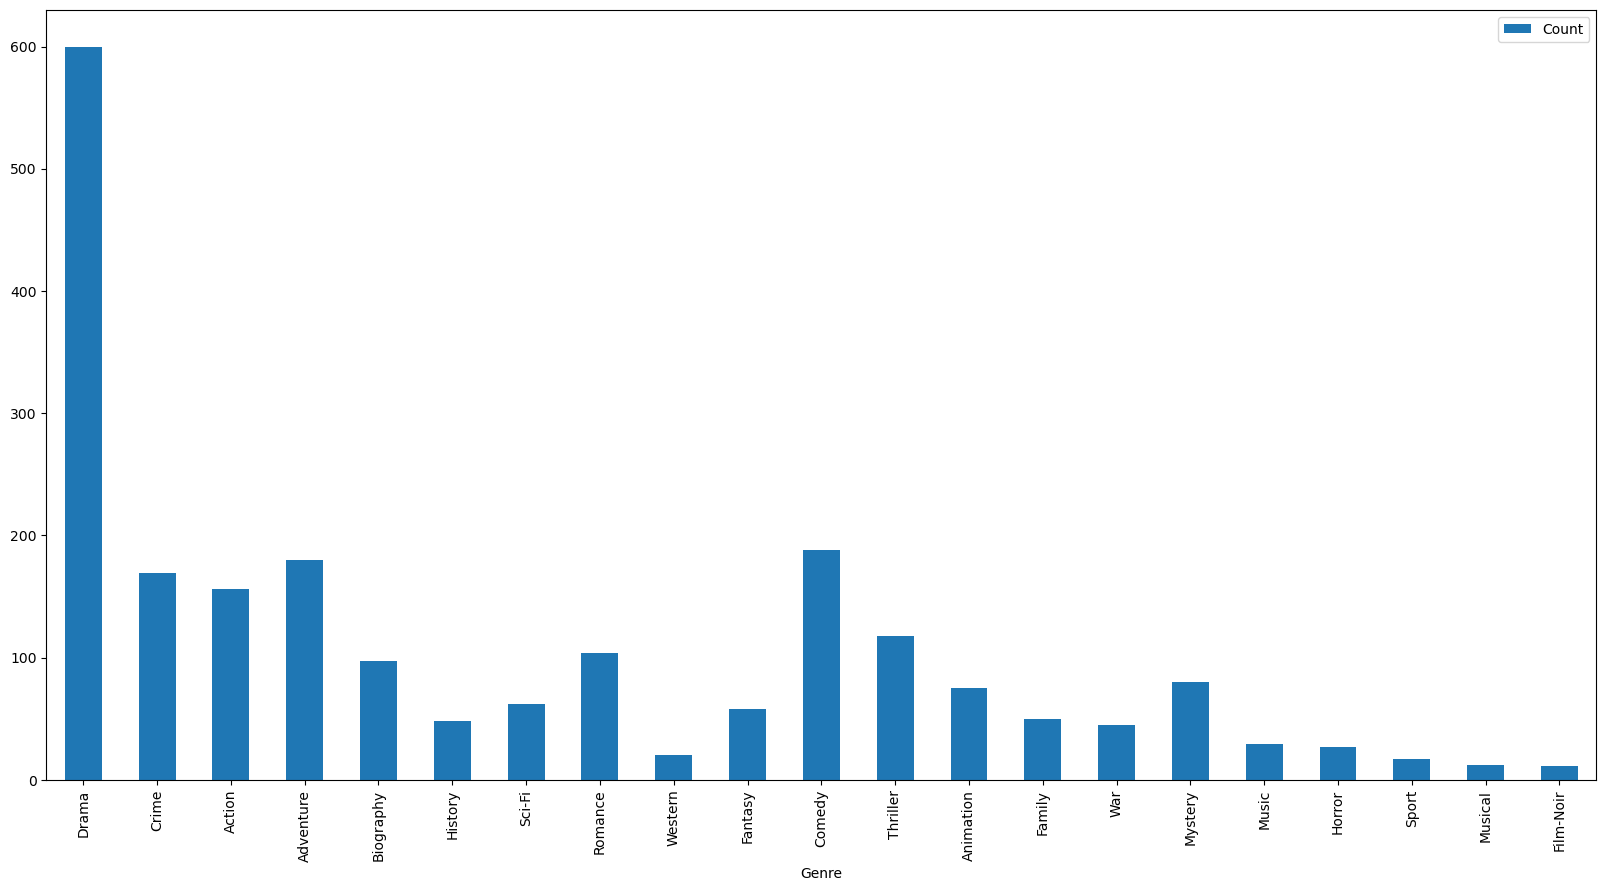

In [13]:
df6.plot(x='Genre', y='Count', figsize=(20,10), kind='bar')

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your IMDb dataset into a pandas DataFrame
data = pd.read_csv('G:\Datasets\imdb_top_1000.csv')

# Assuming your dataset has columns 'movie_title' and 'movie_genre'
X = data['Series_Title']
y = data['Genre']

# ... Continue with the rest of the code, following the steps mentioned above ...

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer to convert titles into numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train the Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict genres for the test set
y_pred = clf.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Get the most popular genre
popular_genre = clf.classes_[clf.class_count_.argmax()]
print(f'Most Popular Genre: {popular_genre}')


Accuracy: 0.10
Most Popular Genre: Drama


In [4]:
import pandas as pd

In [11]:
df = pd.read_csv('G:\Datasets\imdb_top_1000.csv',thousands=',')

# Looping through the columns of the DataFrame
for column in df.columns:
    print(column, end=", ")

Poster_Link, Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating, Overview, Meta_score, Director, Star1, Star2, Star3, Star4, No_of_Votes, Gross, 

In [12]:
for i in df.columns:
    print(i,end=",")

Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,

In [18]:
for name in df.head()['Overview'].values:
    print(name)

    

Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.
An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.
When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.
The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.
A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.


In [19]:
for name in df.head()['Certificate'].values:
    print(name)


A
A
UA
A
U


In [20]:
for name in df.sort_values(by='IMDB_Rating', ascending = False).head()['Series_Title'].values:
    print(name)

The Shawshank Redemption
The Godfather
The Dark Knight
The Godfather: Part II
12 Angry Men


In [23]:
c=0
for genre in df['Genre']:
    if genre=='Drama, Romance':
        c+=1
print(c)

37


In [24]:
genres=[]
for i in df['Genre']:
    genres +=i.split(',')
uni_gen=list(set(genres))
uni_gen

[' Comedy',
 ' Musical',
 'Fantasy',
 ' Mystery',
 ' Sci-Fi',
 ' Fantasy',
 'Biography',
 ' Horror',
 'Western',
 ' War',
 'Comedy',
 ' Action',
 ' Crime',
 'Mystery',
 'Film-Noir',
 'Crime',
 'Drama',
 ' Western',
 'Animation',
 ' Sport',
 'Action',
 'Family',
 ' Thriller',
 'Horror',
 ' Family',
 ' Biography',
 ' Film-Noir',
 ' History',
 ' Music',
 ' Drama',
 'Adventure',
 'Thriller',
 ' Romance',
 ' Adventure']

In [25]:
for gen in uni_gen:
    c=0
    for genre in df['Genre']:
        if (gen in genre):
            c+=1
    print(gen,'--',c)

 Comedy -- 78
 Musical -- 17
Fantasy -- 66
 Mystery -- 87
 Sci-Fi -- 67
 Fantasy -- 64
Biography -- 109
 Horror -- 21
Western -- 20
 War -- 51
Comedy -- 233
 Action -- 17
 Crime -- 102
Mystery -- 99
Film-Noir -- 19
Crime -- 209
Drama -- 724
 Western -- 16
Animation -- 82
 Sport -- 19
Action -- 189
Family -- 56
 Thriller -- 136
Horror -- 32
 Family -- 54
 Biography -- 21
 Film-Noir -- 16
 History -- 56
 Music -- 47
 Drama -- 435
Adventure -- 196
Thriller -- 137
 Romance -- 125
 Adventure -- 124


<AxesSubplot:>

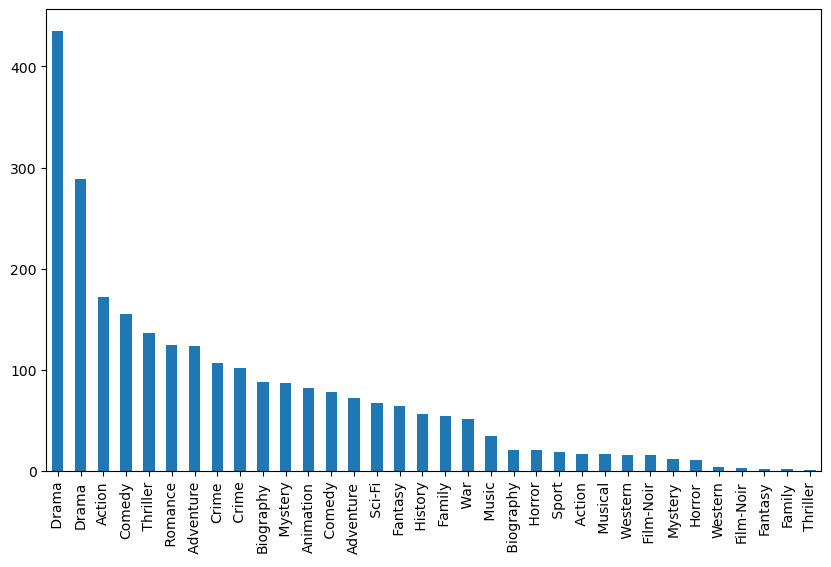

In [26]:
common_genres = df['Genre'].str.split(',', expand=True).stack().value_counts()
common_genres.plot(kind='bar', figsize=(10, 6))

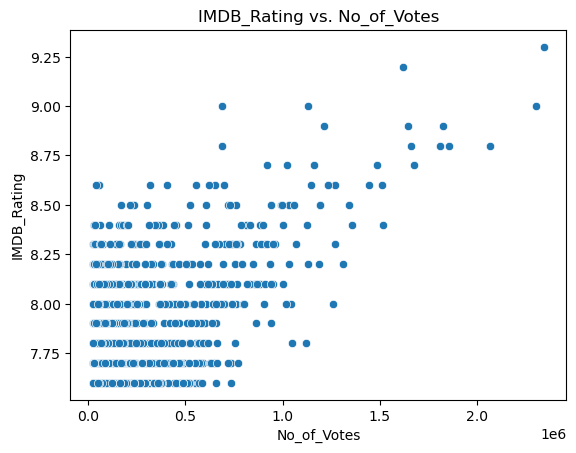

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='No_of_Votes', y='IMDB_Rating')
plt.title('IMDB_Rating vs. No_of_Votes')
plt.xlabel('No_of_Votes')
plt.ylabel('IMDB_Rating')
plt.show()

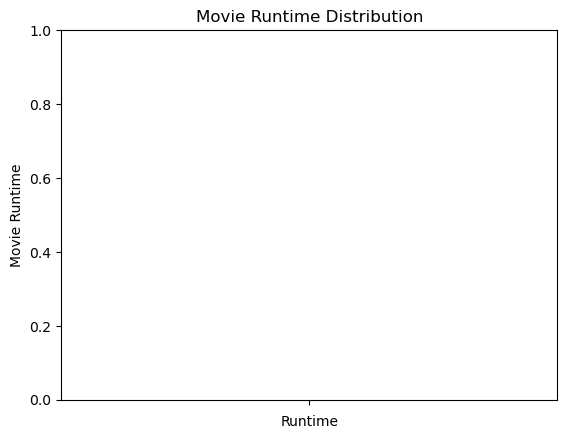

In [34]:
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
sns.boxplot(data=df, y='Runtime')
plt.title('Movie Runtime Distribution')
plt.xlabel('Runtime')
plt.ylabel('Movie Runtime')
plt.show()